# Proyecto Modulo 3

# Comparación empresas cotizando en bolsa 

<font color="cian">**Objetivo general**</font>


+ Analizar el comportamiento de precios en diversas empresas para verificar su probabilidad Precio-Umbral respecto del tiempo.


<font color="cian">**Objetivos específicos**</font>

+ Comparar los rendimientos de las diversas empresas.

+ Identificar la probabilidad de que el precio de cierre sobrepase algún valor umbral.

+ Relacionar los datos obtenidos del 2010 al 2017 con el del año en curso para así denotar si es real el comportamiento inferido.

+ Analizar los diversos escenarios que salgan para poder ver las tendencias y tomar decisiones.





<font color="blue">**Problema**</font>

Se desea conocer el comportamiento de los precios futuros de ciertas empresas a partir de datos sobre sus ingresos diarios proporcionados por Yahoo Finance.
Posteriormente, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima de cierto umbral y con ello tomar decisiones.
De igual manera se harán comparaciones de acuerdo a lo que se inferirá de los datos de 2010 a 2017 verificando con los de 2018 para confirmar o denegar la hipótesis inicial.

<font color="purple">**Empresas**</font>
1. Nike
2. Microsoft 
3. International Business Machines
4. American Eagle Outfitters
5. Santander
6. Netflix
7. Ferrari
8. Hewlett- Packard
9. The Coca- Cola Company

<font color="blue">**Modelo que representa el problema**</font>

Inicialmente para poder hacer simular escenarios de predicción de precios, utilizaremos el paquete `data` de la librería `pandas_datareader` para poder descargar los datos de Yahoo Finance.

+ Simulamos los rendimientos diarios

Ya que los precios diarios no ser un proceso estocástico estacionario, pero los rendimientos diarios sí, calculamos los rendimientos a partir de precios de cierre de la siguiente forma.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}\exp(r_0+\cdots+r_{k})$, donde $p_{-1}$ es el último precio reportado en el año que necesitemos.

**Nike**

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
# Descargamos datos...
# Instrumento: Nike
name = ['NKE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

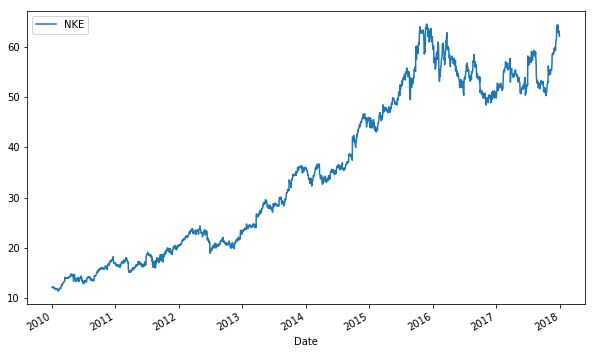

In [4]:
# Graficamos
closes.plot(figsize=(10,6));

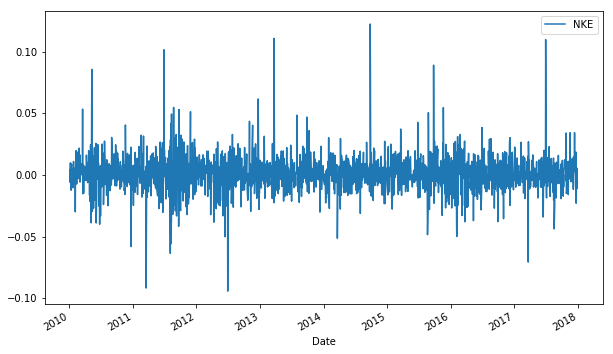

In [5]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [6]:
# Calculamos media y desviación estándar
mu, std = ret.mean().NKE, ret.std().NKE
mu, std

(0.0009165993523622087, 0.014710456609092698)

In [7]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [8]:
# Simulamos 100 escenarios para todo el 2018
simret = ret_sim(mu, std, 252, 10000, '2018-01-01')

In [9]:
# Obtenemos los precios
simcloses = closes.iloc[-1].NKE*((1+simret).cumprod())

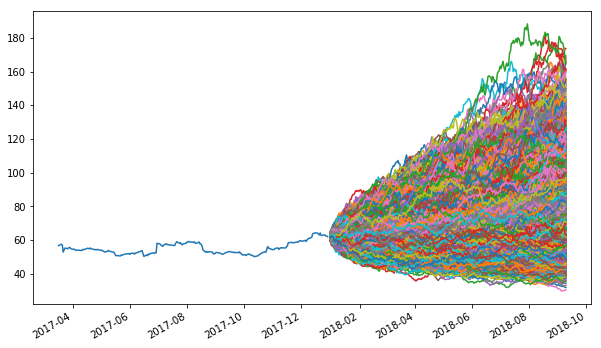

In [10]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [11]:
closes.iloc[-1].NKE*1.1

68.23834877014161

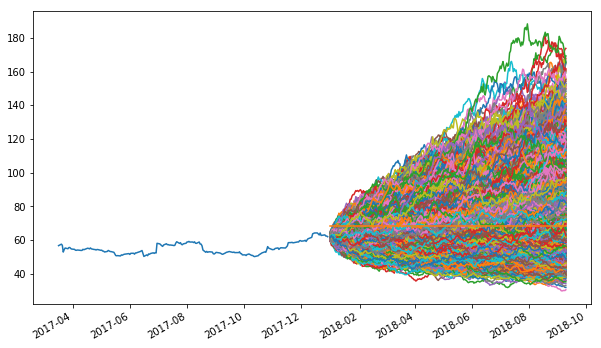

In [12]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].NKE*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(10,6), legend=False);

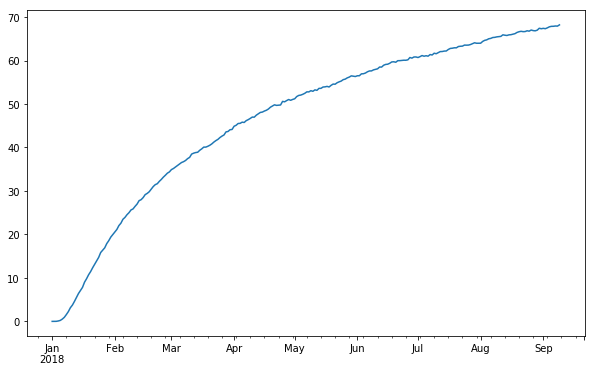

In [13]:
# Comparar cada escenario en cada fecha
TF = simcloses>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

In [14]:
# Instrumento: Nike
name = ['NKE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

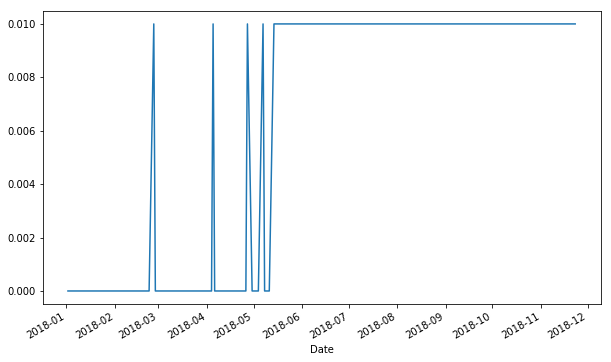

In [15]:
# Comparar cada escenario en cada fecha
TF = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

<font color="RED">FERRARI</font>

In [43]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes1(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [86]:
# Descargamos datos...
# Instrumento: Adidas
name = ['RACE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes1(tickers=name, start_date=start, end_date=end, freq='d')

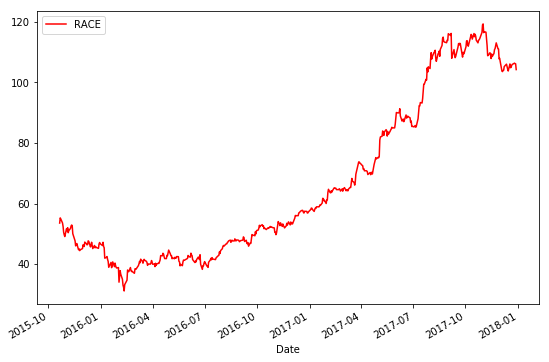

In [87]:
# Graficamos
closes.plot(figsize=(9,6), c="r");

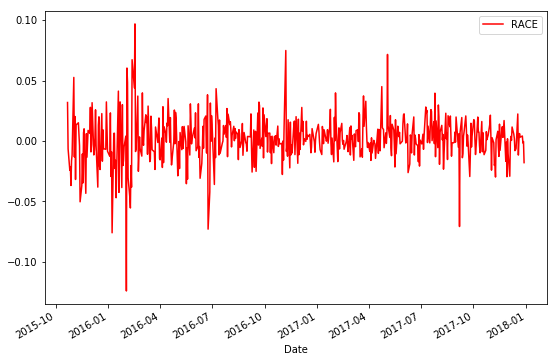

In [88]:
# Calcular rendimientos diarios y graficarlos
ret1 = closes.pct_change().dropna()
ret1.plot(figsize=(9,6), c= "r");

In [89]:
# Calculamos media y desviación estándar
mu1, std1 = ret1.mean().RACE, ret1.std().RACE,
mu1, std1

(0.0013909982876437698, 0.019199371535929856)

In [90]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim1(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [91]:
# Simulamos 10000 escenarios para todo el 2018
simret1 = ret_sim1(mu1, std1, 252, 10000, '2018-01-01')

In [92]:
# Obtenemos los precios
simcloses1 = closes.iloc[-1].RACE*((1+simret1).cumprod())

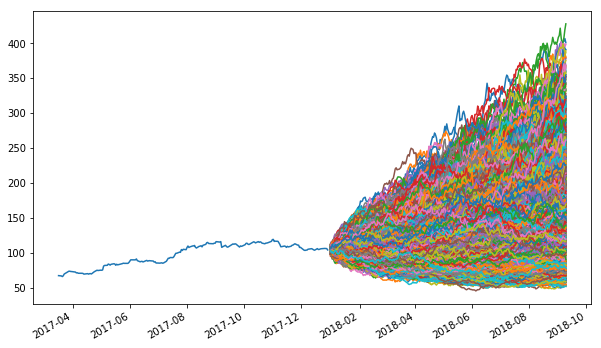

In [93]:
# Concatenar y graficar
simcloses1_ex = pd.concat([closes.iloc[-200:], simcloses1])
simcloses1_ex.plot(figsize=(10,6), legend=False);

In [94]:
closes.iloc[-1].RACE*1.1

114.65656204223633

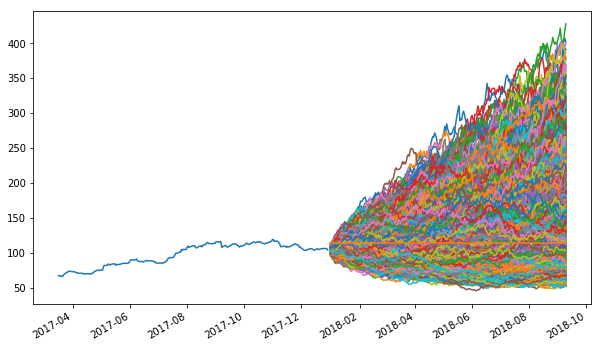

In [95]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].RACE*1.1
# Fechas
dates = simcloses1.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses1_ex_K = pd.concat([simcloses1_ex.T, Strike.T]).T
simcloses1_ex_K.plot(figsize=(10,6), legend=False);

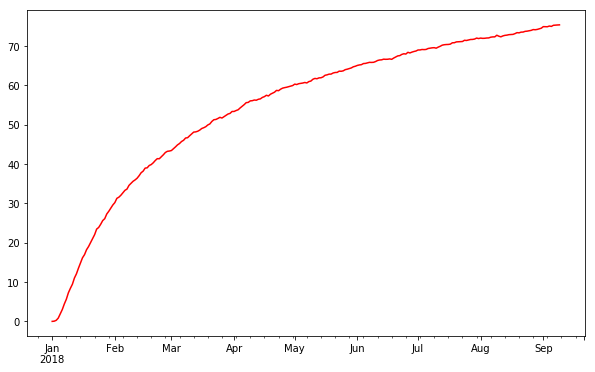

In [96]:
# Comparar cada escenario en cada fecha
TF1 = simcloses1>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF1.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="r", legend=False);

In [97]:
# Instrumento: Nike
name = ['RACE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes1(tickers=name, start_date=start, end_date=end, freq='d')

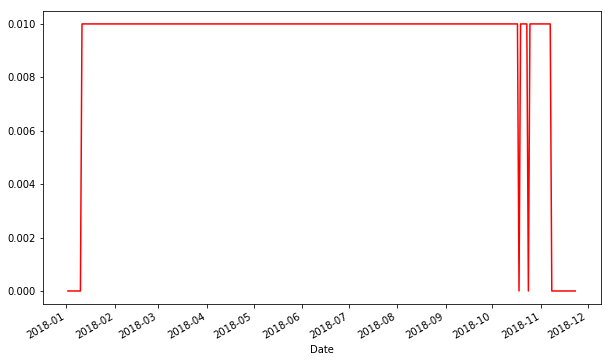

In [98]:
# Comparar cada escenario en cada fecha
TF1 = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF1.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="r", legend=False);

<font color="green">Hewlett- Packard</font>

In [70]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes2(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [73]:
# Descargamos datos...
# Instrumento: Hewlett- Packard
name = ['HPE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes2 = get_closes2(tickers=name, start_date=start, end_date=end, freq='d')

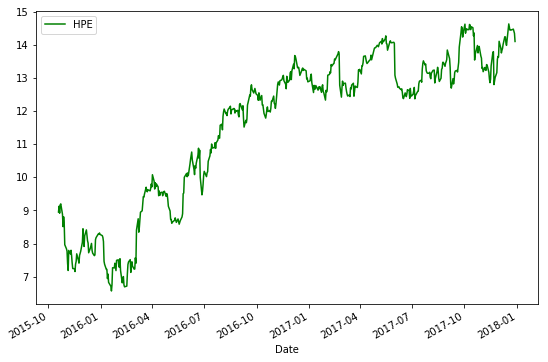

In [74]:
# Graficamos
closes2.plot(figsize=(9,6), c="g");

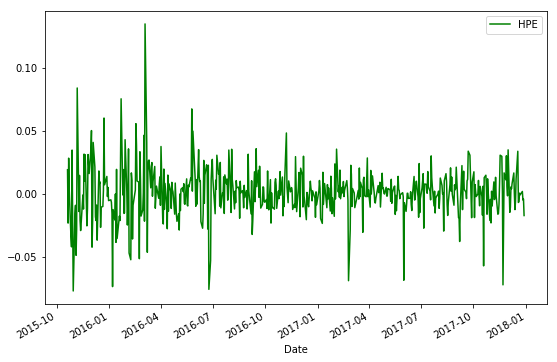

In [75]:
# Calcular rendimientos diarios y graficarlos
ret2 = closes.pct_change().dropna()
ret2.plot(figsize=(9,6), c= "g");

In [76]:
# Calculamos media y desviación estándar
mu2, std2 = ret2.mean().HPE, ret2.std().HPE,
mu2, std2

(0.0010213627741533563, 0.020087577358942215)

In [77]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim2(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [79]:
# Simulamos 10000 escenarios para todo el 2018
simret2 = ret_sim2(mu2, std2, 252, 10000, '2018-01-01')

In [99]:
# Obtenemos los precios
simcloses2 = closes2.iloc[-1].HPE*((1+simret2).cumprod())

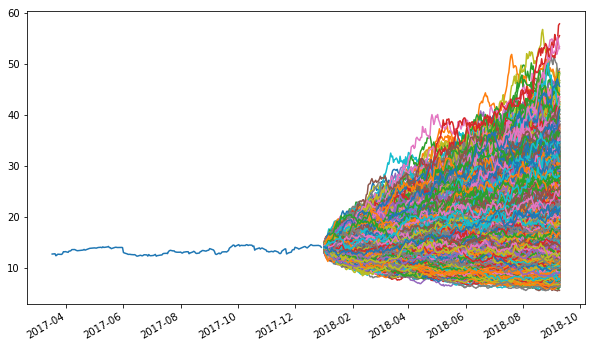

In [108]:
# Concatenar y graficar
simcloses2_ex = pd.concat([closes2.iloc[-200:], simcloses2])
simcloses2_ex.plot(figsize=(10,6), legend=False);

In [101]:
closes2.iloc[-1].HPE*1.1

15.516276836395265

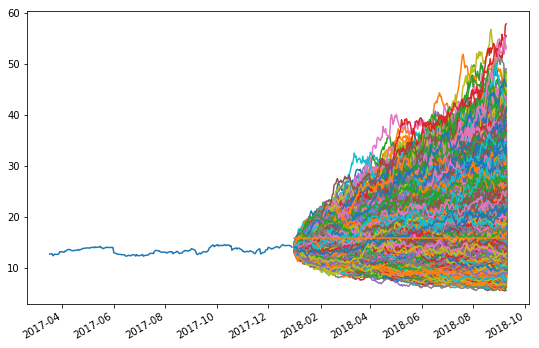

In [111]:
# Umbral de 110% del ultimo precio
K = closes2.iloc[-1].HPE*1.1
# Fechas
dates = simcloses2.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses2_ex_K = pd.concat([simcloses2_ex.T, Strike.T]).T
simcloses2_ex_K.plot(figsize=(9,6), legend=False);

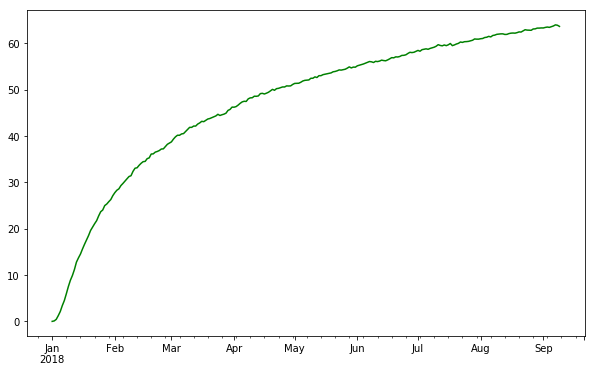

In [105]:
# Comparar cada escenario en cada fecha
TF2 = simcloses2>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF2.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="G", legend=False);

In [127]:
# Instrumento: Hewlett- Packard
name = ['HPE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes2 = get_closes2(tickers=name, start_date=start, end_date=end, freq='d')

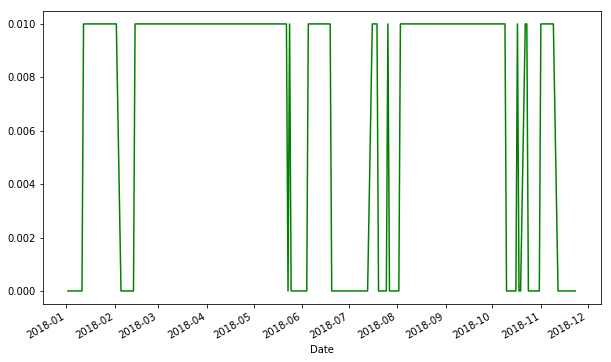

In [110]:
# Comparar cada escenario en cada fecha
TF2 = closes2>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF2.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="G", legend=False);

<font color="lightsalmon">The Coca-Cola Company</font>

In [216]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [217]:
# Descargamos datos...
# Instrumento: The Coca-Cola Company
name = ['KO']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

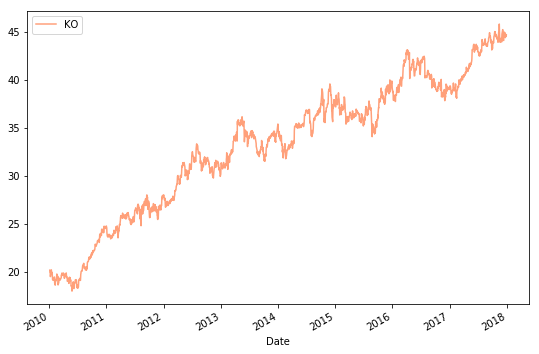

In [218]:
# Graficamos
closes.plot(figsize=(9,6), c="lightsalmon");

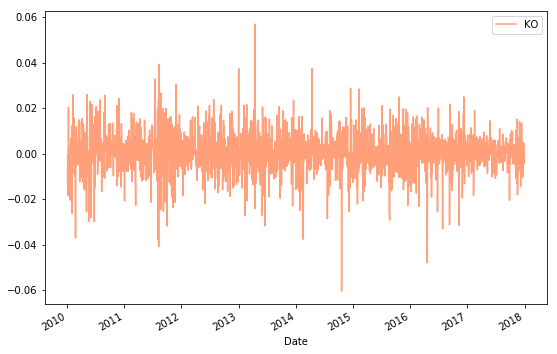

In [220]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(9,6), c= "lightsalmon");

In [221]:
# Calculamos media y desviación estándar
mu, std = ret.mean().KO, ret.std().KO,
mu, std

(0.00043569448430480766, 0.00913613795233894)

In [222]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [223]:
# Simulamos 10000 escenarios para todo el 2018
simret = ret_sim(mu, std, 252, 10000, '2018-01-01')

In [224]:
# Obtenemos los precios
simcloses = closes.iloc[-1].KO*((1+simret4).cumprod())

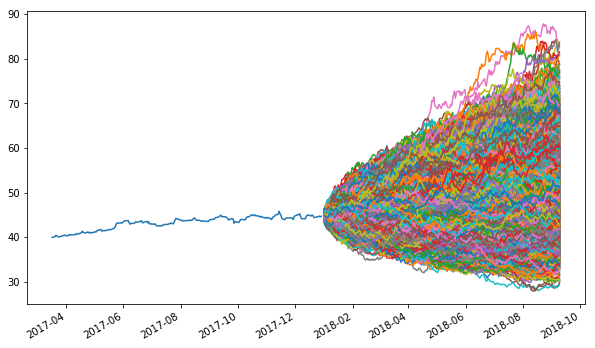

In [225]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [226]:
closes.iloc[-1].KO*1.1

49.16657676696778

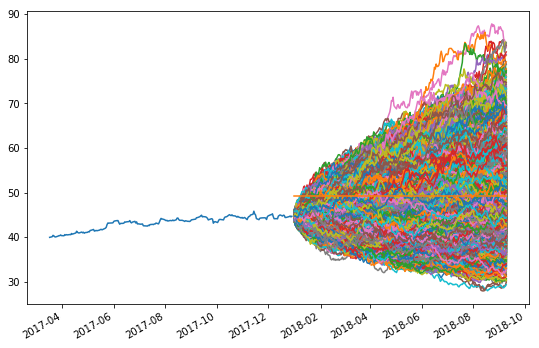

In [228]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].KO*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(9,6), legend=False);

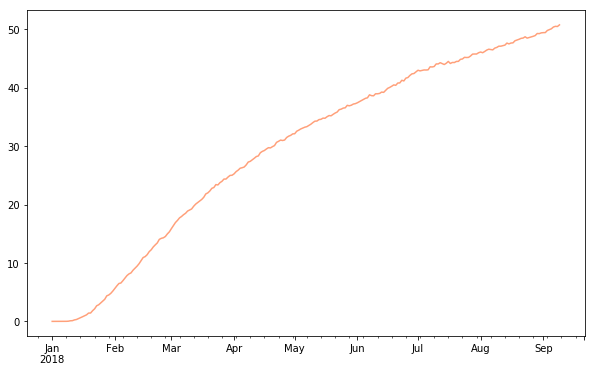

In [229]:
# Comparar cada escenario en cada fecha
TF4 = simcloses > K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF4.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="lightsalmon", legend=False);

In [230]:
# Instrumento: The Coca- Cola Company
name = ['KO']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

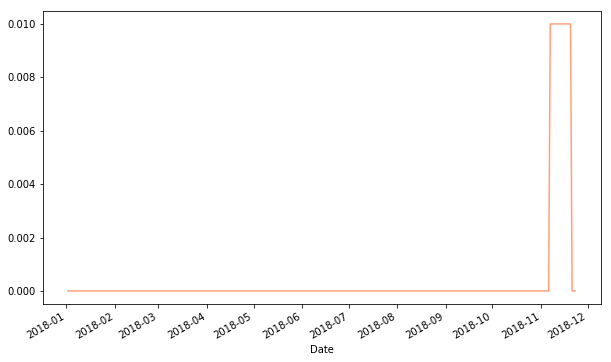

In [231]:
# Comparar cada escenario en cada fecha
TF6 = closes > K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF6.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), c="lightsalmon", legend=False);

**American Eagle Outfitters**

In [4]:
# Descargamos datos...
name = ['AEO']
# Fechas de interés (inicio y fin): 2010-2017
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

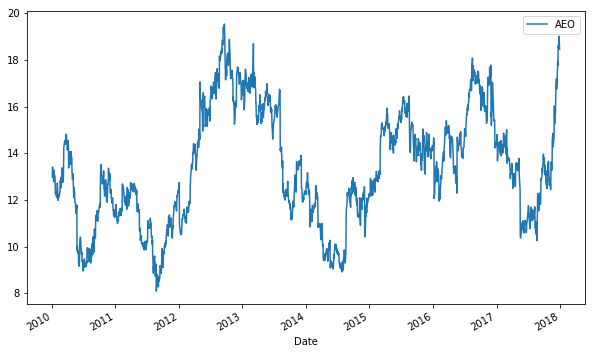

In [5]:
# Graficamos
closes.plot(figsize=(10,6));

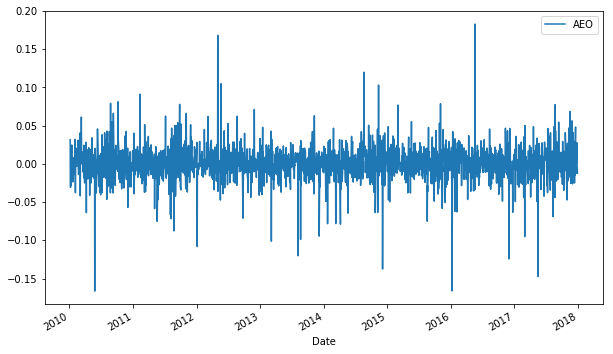

In [6]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [7]:
mu, std = ret.mean().AEO, ret.std().AEO
mu, std

(0.000451943249150635, 0.02348019690297658)

In [8]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [9]:
# Simulamos 100 escenarios para todo el 2017
simret = ret_sim(mu, std, 252, 1000, '2018-01-01')

In [10]:
simcloses = closes.iloc[-1].AEO*((1+simret).cumprod())

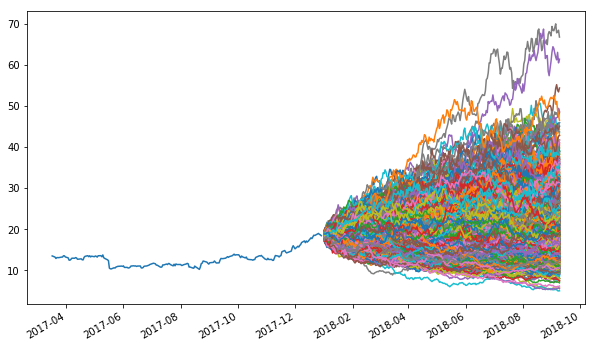

In [11]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [12]:
closes.iloc[-1].AEO*1.1

20.297310829162598

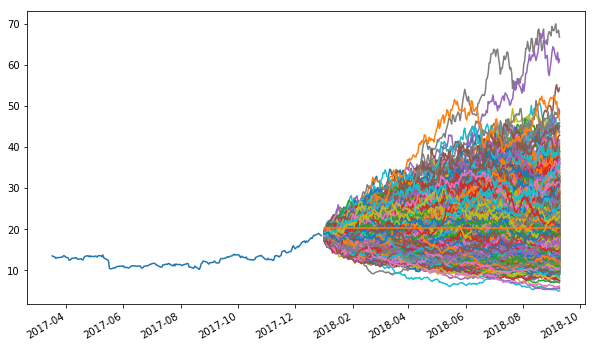

In [13]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].AEO*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(10,6), legend=False);

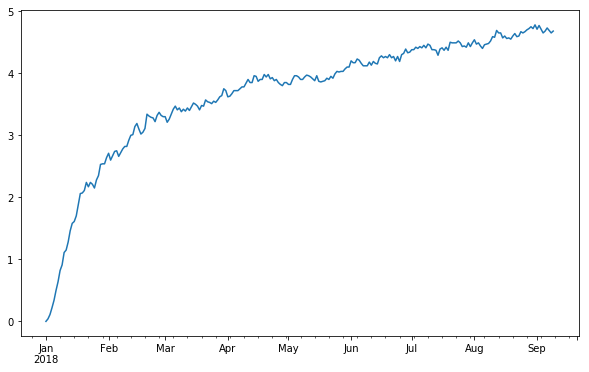

In [14]:
# Comparar cada escenario en cada fecha
TF = simcloses>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

In [15]:
# Instrumento: AEO
name = ['AEO']
# Fechas de interés (inicio y fin): 2018-2018
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

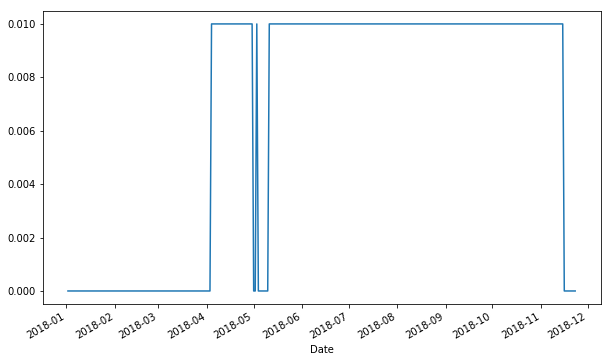

In [16]:
# Comparar cada escenario en cada fecha
TF = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

**Santander**

In [17]:
# Descargamos datos...
name = ['SAN']
# Fechas de interés (ixnicio y fin): 2010-2017
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

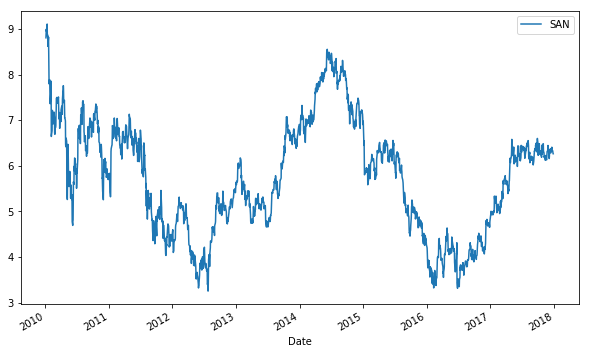

In [18]:
# Graficamos
closes.plot(figsize=(10,6));

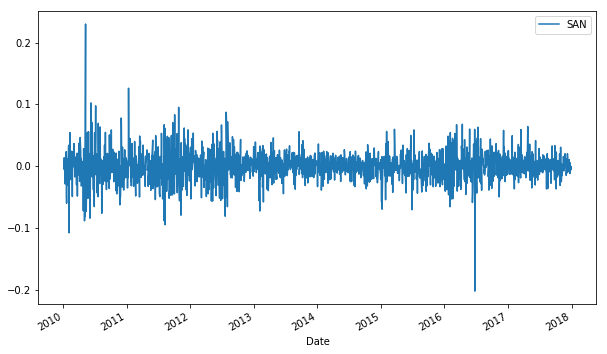

In [19]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [20]:
mu, std = ret.mean().SAN, ret.std().SAN
mu, std

(0.000116096292539394, 0.02388945134105896)

In [21]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [22]:
# Simulamos 100 escenarios para todo el 2017
simret = ret_sim(mu, std, 252, 1000, '2018-01-01')

In [23]:
simcloses = closes.iloc[-1].SAN*((1+simret).cumprod())

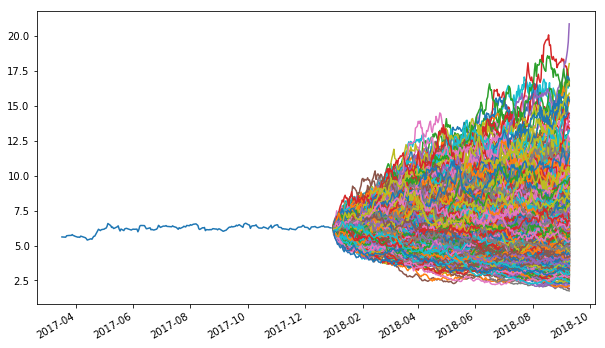

In [24]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [25]:
closes.iloc[-1].SAN*1.1

6.891519260406494

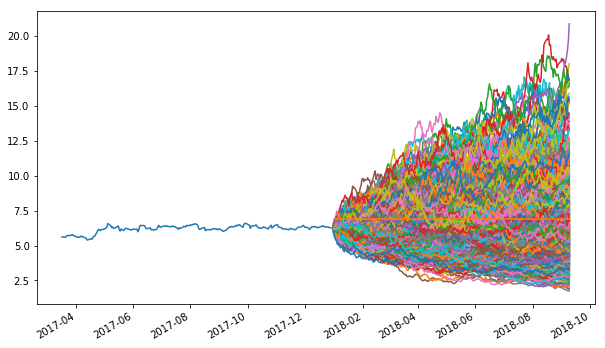

In [26]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].SAN*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(10,6), legend=False);

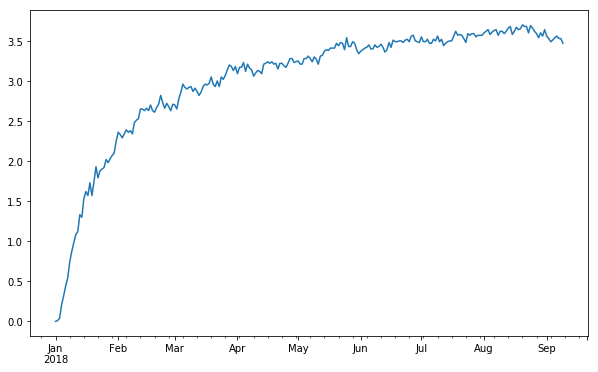

In [27]:
# Comparar cada escenario en cada fecha
TF = simcloses>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

In [28]:
# Instrumento: SAN
name = ['SAN']
# Fechas de interés (inicio y fin): 2018-2018
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

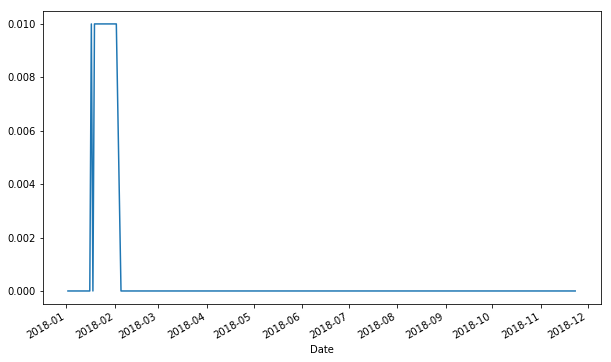

In [29]:
# Comparar cada escenario en cada fecha
TF = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

**Netflix**

In [30]:
# Descargamos datos...
name = ['NFLX']
# Fechas de interés (inicio y fin): 2010-2017
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

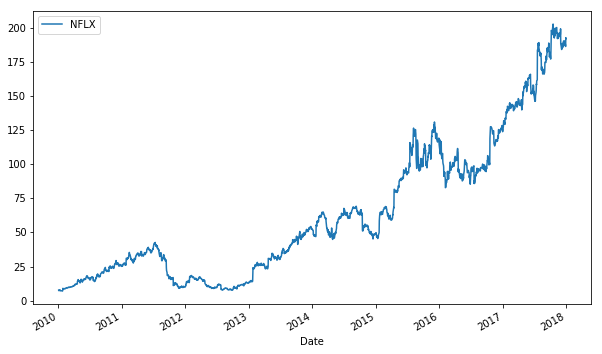

In [31]:
# Graficamos
closes.plot(figsize=(10,6));

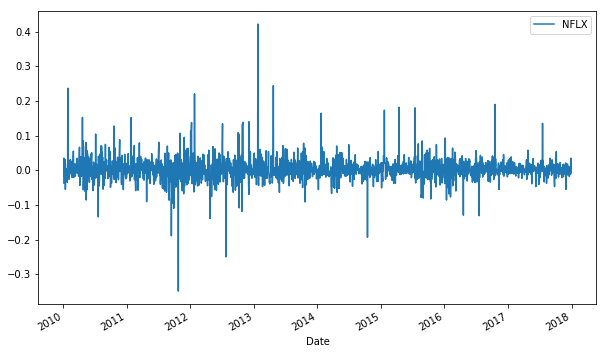

In [32]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [33]:
mu, std = ret.mean().NFLX, ret.std().NFLX
mu, std

(0.002187457577524405, 0.03434643769831721)

In [34]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [35]:
# Simulamos 100 escenarios para todo el 2017
simret = ret_sim(mu, std, 252, 1000, '2018-01-01')

In [36]:
simcloses = closes.iloc[-1].NFLX*((1+simret).cumprod())

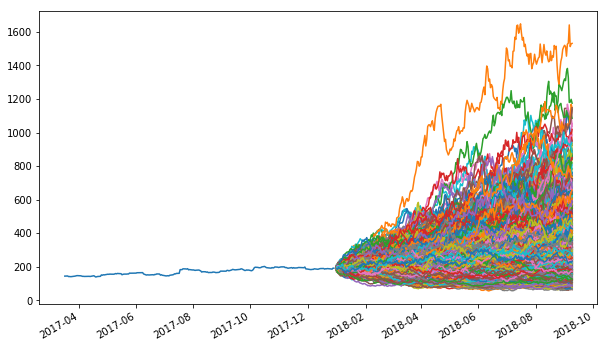

In [37]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [38]:
closes.iloc[-1].NFLX*1.1

211.15600738525393

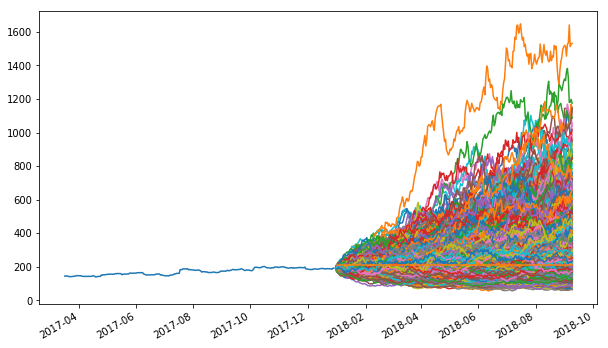

In [39]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].NFLX*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(10,6), legend=False);

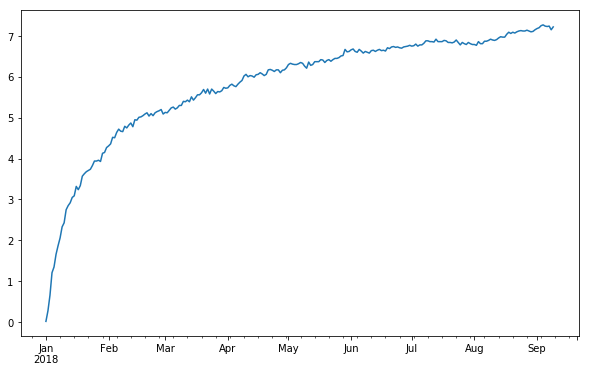

In [40]:
# Comparar cada escenario en cada fecha
TF = simcloses>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

In [41]:
# Instrumento: NFLX
name = ['NFLX']
# Fechas de interés (inicio y fin): 2018-2018
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

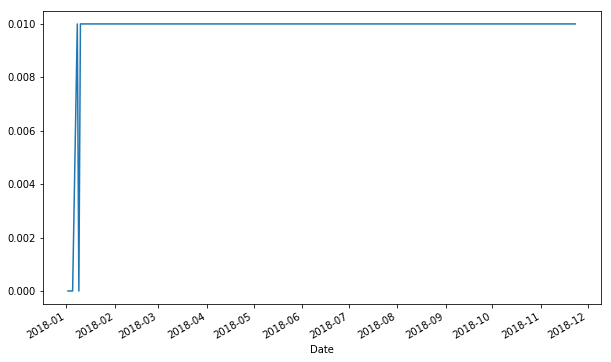

In [42]:
# Comparar cada escenario en cada fecha
TF = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);